In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show Code"></form>''')

# **Statistical Analysis**

In [2]:
# Import useful libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from collections import defaultdict

import matplotlib as mpl
import seaborn as sns

sns.set(style ='white',font_scale=1.25)

%matplotlib inline

In [3]:
with open('../data/01-House-Price/wrangled_data.pkl','rb') as file:
    housing_orig, FEATURES = pickle.load(file)

In [4]:
housing = housing_orig.copy()
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
Id                                                                      
1          60       RL         65.0     8450   Pave  Missing      Reg   
2          20       RL         80.0     9600   Pave  Missing      Reg   
3          60       RL         68.0    11250   Pave  Missing      IR1   
4          70       RL         60.0     9550   Pave  Missing      IR1   
5          60       RL         84.0    14260   Pave  Missing      IR1   

   LandContour Utilities LotConfig  ... SaleType SaleCondition SalePrice  \
Id                                  ...                                    
1          Lvl    AllPub    Inside  ...       WD        Normal    208500   
2          Lvl    AllPub       FR2  ...       WD        Normal    181500   
3          Lvl    AllPub    Inside  ...       WD        Normal    223500   
4          Lvl    AllPub    Corner  ...       WD       Abnorml    140000   
5          Lvl    AllPub       FR2  ...       WD        Normal    250000   

   log1p(SalePrice) log1p(GrLivArea)        Lat        Lng  zipcode  \
Id                                                                    
1         12.247699         7.444833  42.022197 -93.651510  50010.0   
2         12.109016         7.141245  42.041304 -93.650302  50011.0   
3         12.317171         7.488294  42.022197 -93.651510  50010.0   
4         11.849405         7.448916  42.018614 -93.648898  50014.0   
5         12.429220         7.695758  42.053510 -93.648636  50010.0   

    median_household_income  median_home_value  
Id                                              
1                   48189.0           165300.0  
2                   48189.0           165300.0  
3                   48189.0           165300.0  
4                   37661.0           212500.0  
5                   48189.0           165300.0  

[5 rows x 87 columns]

In [5]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1,len(x)+1)/len(x)
    return x, y

Important features:
1. OverallCond
2. SaleCondition
3. Functional
4. Neighborhood
5. Exterior1st
6. Condition1
7. BsmtFinSF1
8. BsmtFullBath
9. OverallQual
10. GarageYrBlt
11. MSSubClass
12. 1stFlrSF
13. GarageArea
14. BsmtQual
15. TotalBsmtSF
16. SaleType
17. HeatingQC
18. GarageType
19. ExterQual
20. RoofMatl
21. Heating

In [6]:
impfeat = 'OverallCond SaleCondition Functional \
            Neighborhood Exterior1st Condition1 \
            BsmtFinSF1 BsmtFullBath OverallQual \
            GarageYrBlt MSSubClass 1stFlrSF GarageArea \
            BsmtQual TotalBsmtSF SaleType HeatingQC \
            GarageType ExterQual RoofMatl Heating'.split()

In [7]:
housing = housing[impfeat+['SalePrice']]
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443 entries, 1 to 1460
Data columns (total 22 columns):
OverallCond      1443 non-null int64
SaleCondition    1443 non-null object
Functional       1443 non-null object
Neighborhood     1443 non-null object
Exterior1st      1443 non-null object
Condition1       1443 non-null object
BsmtFinSF1       1443 non-null int64
BsmtFullBath     1443 non-null int64
OverallQual      1443 non-null int64
GarageYrBlt      1443 non-null float64
MSSubClass       1443 non-null object
1stFlrSF         1443 non-null int64
GarageArea       1443 non-null int64
BsmtQual         1443 non-null object
TotalBsmtSF      1443 non-null int64
SaleType         1443 non-null object
HeatingQC        1443 non-null object
GarageType       1443 non-null object
ExterQual        1443 non-null object
RoofMatl         1443 non-null object
Heating          1443 non-null object
SalePrice        1443 non-null int64
dtypes: float64(1), int64(8), object(13)
memory usage: 259.3+ KB

In [8]:
housing['SaleCondition'].value_counts().sort_index()

Abnorml     100
AdjLand       4
Alloca       12
Family       20
Normal     1184
Partial     123
Name: SaleCondition, dtype: int64

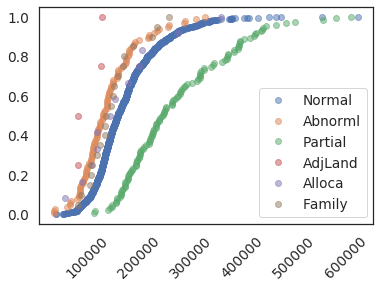

In [9]:
for ii, level in enumerate(housing['SaleCondition'].unique()):
    x,y = ecdf(housing[housing['SaleCondition']==level]['SalePrice'])
    plt.plot(x,y,linestyle='None',marker='o',label=level,alpha=0.5,color='C%i' %(ii))

_=plt.xticks(rotation = 45)
_=plt.legend()

In [10]:
def nlevels(df,cat=True):
    unique_cats = defaultdict(int)
    if cat:
        for col in df.columns:
            if df[col].dtypes == 'object':
                unique_cats[col] = housing[col].nunique()
        num_unique_cats = pd.Series(unique_cats,name='categorical')
    else:
        for col in df.columns:
            if df[col].dtypes != 'object':
                unique_cats[col] = housing[col].nunique()
        num_unique_cats = pd.Series(unique_cats,name='non-categorical')
        
    return num_unique_cats.sort_values(ascending = False)

In [11]:
nlevels(housing,False)

1stFlrSF        740
TotalBsmtSF     710
SalePrice       656
BsmtFinSF1      628
GarageArea      433
GarageYrBlt      96
OverallQual      10
OverallCond       9
BsmtFullBath      4
Name: non-categorical, dtype: int64

In [12]:
nlevels(housing,True)

Neighborhood     25
MSSubClass       15
Exterior1st      15
SaleType          9
Condition1        9
GarageType        7
Functional        7
Heating           6
RoofMatl          6
SaleCondition     6
HeatingQC         5
BsmtQual          5
ExterQual         4
Name: categorical, dtype: int64

## Correlation of quantitative variables with the target.

In [13]:
housing.drop('SalePrice',axis=1).corrwith(housing.SalePrice,method='spearman').sort_values(ascending=False)

OverallQual     0.813875
GarageArea      0.649453
TotalBsmtSF     0.595935
GarageYrBlt     0.574716
1stFlrSF        0.568190
BsmtFinSF1      0.289964
BsmtFullBath    0.216477
OverallCond    -0.133790
dtype: float64

Looks like OverallQual, GarageArea, TotalBsmtSF, GarageYrBlt, and 1stFlrSF are highly correlated with the SalePrice.

To find out how significant is the correlation, we will do a permutation test. We will shuffle the values of the feature and re-compute the correlation to simulate the null distribution.

In [23]:
from scipy.stats import spearmanr
def perm_test(SalePrice,feat,N = 10000):
    feat = feat.copy()
    emp_corr = spearmanr(SalePrice,feat)
    corr_dist = np.empty(N)
    k = 0
    for ii in range(N):
        np.random.shuffle(feat)
        corr_dist[ii] = spearmanr(SalePrice,feat)[0]
        k += np.abs(corr_dist[ii]) > np.abs(emp_corr[0])
        
    return (emp_corr[0], (k+1)/(N+1))

In [24]:
np.random.seed(42)
for feat in ['OverallQual','GarageArea','TotalBsmtSF','GarageYrBlt','1stFlrSF']:
    emp_corr, p = perm_test(housing.SalePrice.values,housing[feat].values)
    print(feat+': (coeff = %.4f, p-value = %.6f)' %(emp_corr,p))

OverallQual: (coeff = 0.8139, p-value = 0.000100)
GarageArea: (coeff = 0.6495, p-value = 0.000100)
TotalBsmtSF: (coeff = 0.5959, p-value = 0.000100)
GarageYrBlt: (coeff = 0.5747, p-value = 0.000100)
1stFlrSF: (coeff = 0.5682, p-value = 0.000100)


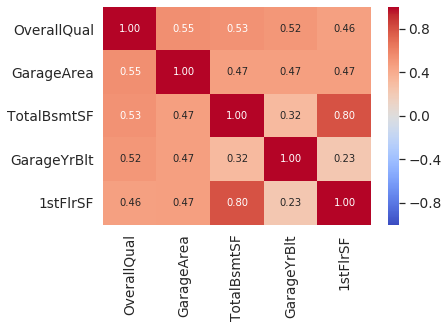

In [33]:
sns.heatmap(housing[['OverallQual','GarageArea','TotalBsmtSF','GarageYrBlt','1stFlrSF']].corr(),
            vmax=1,vmin=-1,annot=True,cmap='coolwarm',fmt='.2f')